In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('heart-disease.csv')

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df['target'].unique()

array([1, 0])

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<Axes: >

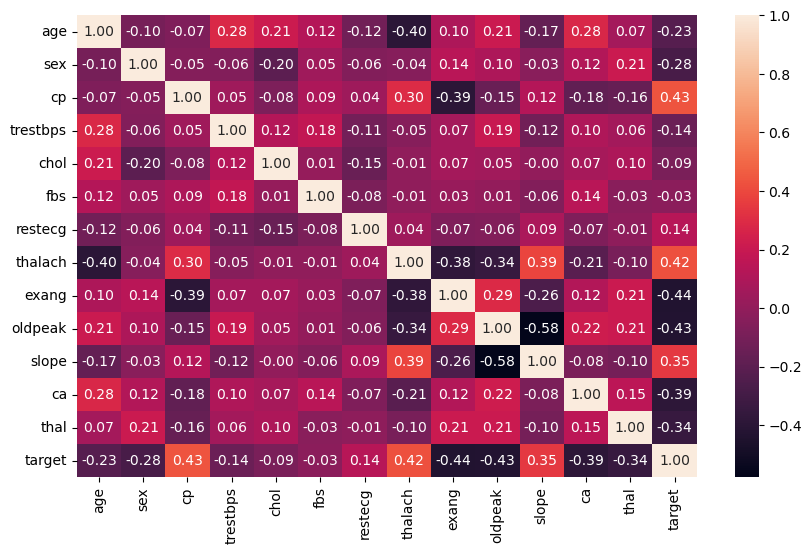

In [14]:
correlation = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True,fmt="1.2f")

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [16]:
X=df.drop('target', axis=1)
y=df['target']

In [17]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [18]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=40)

In [53]:
X_train.shape

(227, 13)

In [54]:
y_train.shape

(227,)

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
X_train_scaled

array([[ 1.90156437, -1.51322671, -0.95833284, ..., -0.64411631,
        -0.6964023 , -0.49456042],
       [ 0.42562632, -1.51322671, -0.95833284, ..., -0.64411631,
         1.25524365, -2.07576062],
       [ 0.08502523, -1.51322671, -0.95833284, ..., -0.64411631,
         0.27942068,  1.08663979],
       ...,
       [ 1.44742959,  0.66083951, -0.95833284, ..., -0.64411631,
         2.23106662, -0.49456042],
       [-1.16384542,  0.66083951,  0.00424041, ...,  0.99874214,
        -0.6964023 ,  1.08663979],
       [-0.70971064,  0.66083951, -0.95833284, ...,  0.99874214,
         1.25524365,  1.08663979]])

In [57]:
X_test_scaled

array([[-1.27737912,  0.66083951, -0.95833284,  1.02448219, -0.00392075,
        -0.39769745,  0.92206114,  0.9653664 , -0.6815542 ,  0.42976994,
         0.99874214, -0.6964023 , -0.49456042],
       [ 1.1068285 , -1.51322671,  0.96681367,  0.45153945,  1.27304899,
        -0.39769745,  0.92206114, -0.73234014, -0.6815542 , -0.69856734,
         0.99874214, -0.6964023 ,  1.08663979],
       [ 0.9932948 , -1.51322671,  0.00424041,  0.45153945, -1.01001812,
        -0.39769745,  0.92206114,  1.32277831, -0.6815542 , -0.87215769,
         0.99874214,  1.25524365, -0.49456042],
       [-0.25557585,  0.66083951, -0.95833284, -0.40787465, -0.68110167,
        -0.39769745,  0.92206114,  0.83133694, -0.6815542 , -0.00420593,
         0.99874214,  1.25524365,  1.08663979],
       [-0.25557585,  0.66083951,  0.96681367,  0.33695091, -0.46827338,
        -0.39769745,  0.92206114,  0.87601343, -0.6815542 , -0.87215769,
         0.99874214,  3.2068896 , -0.49456042],
       [ 0.65269372, -1.513226

In [58]:
treeClassificationModel = DecisionTreeClassifier()
treeClassificationModel.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [59]:
y_pred = treeClassificationModel.predict(X_test_scaled)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [61]:
cm = classification_report(y_test, y_pred)

In [62]:
print(cm)

              precision    recall  f1-score   support

           0       0.68      0.82      0.75        34
           1       0.83      0.69      0.75        42

    accuracy                           0.75        76
   macro avg       0.76      0.76      0.75        76
weighted avg       0.76      0.75      0.75        76



In [63]:
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[28  6]
 [13 29]]


In [65]:
print(accuracy_score(y_test, y_pred))

0.75


In [66]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.01, 0.1, 1.0]
}


In [67]:
treeModel = DecisionTreeClassifier()

In [68]:
treeModelTunned = GridSearchCV(estimator=treeModel, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

In [69]:
treeModelTunned.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.01, 0.1, 1.0],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [70]:
finTunning  = treeModelTunned.predict(X_test_scaled)

In [71]:
treeModelTunned.best_params_

{'ccp_alpha': 0.01,
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [72]:
treeModelTunned.best_score_

0.8019323671497585

In [73]:
from sklearn.svm import SVC

svmModel = SVC()
svmModel.fit(X_train_scaled,y_train)

SVC()

In [74]:
yPredict = svmModel.predict(X_test_scaled)

In [75]:
cm = classification_report(y_test,yPredict)
print(cm)

              precision    recall  f1-score   support

           0       0.90      0.76      0.83        34
           1       0.83      0.93      0.88        42

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



In [76]:
print(accuracy_score(y_test,yPredict))

0.8552631578947368


In [77]:
confusionMatrix = confusion_matrix(y_test,yPredict)

<Axes: >

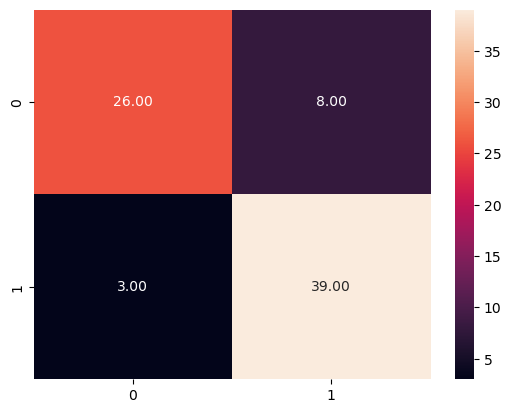

In [78]:
sns.heatmap(confusionMatrix,annot=True,fmt=".2f")

In [79]:
params = {
    "C":[1,10,100,1000,10000],
    "kernel":["rbf", "sigmoid"],
    "gamma":["scale","auto"],
    "decision_function_shape":["ovr"],
}

In [80]:
model = SVC()
SupportVector = GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, refit=True, verbose=2)

In [81]:
SupportVector.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END C=1, decision_function_shape=ovr, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=1, decision_function_shape=ovr, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=1, decision_function_shape=ovr, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=1, decision_function_shape=ovr, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=1, decision_function_shape=ovr, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=1, decision_function_shape=ovr, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END C=1, decision_function_shape=ovr, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END C=1, decision_function_shape=ovr, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END C=1, decision_function_shape=ovr, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END C=1, decision_function_shape=ovr, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=1, decision_function_shape=ovr, gamma=auto

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'decision_function_shape': ['ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=2)

In [82]:
predictions = SupportVector.predict(X_test_scaled)

In [83]:
print(accuracy_score(y_test,predictions
                    ))

0.8552631578947368


In [84]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))


              precision    recall  f1-score   support

           0       0.90      0.76      0.83        34
           1       0.83      0.93      0.88        42

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76

[[26  8]
 [ 3 39]]


<Axes: >

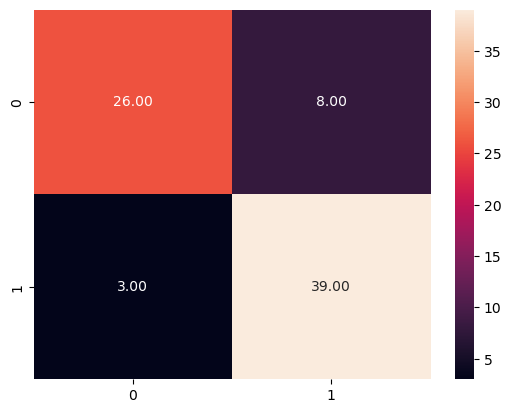

In [85]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2f')

In [86]:
SupportVector.best_score_

0.8021256038647342

In [87]:
SupportVector.best_params_

{'C': 1, 'decision_function_shape': 'ovr', 'gamma': 'scale', 'kernel': 'rbf'}

In [88]:
from sklearn.naive_bayes import GaussianNB

In [89]:
navieModel = GaussianNB()
navieModel.fit(X_train_scaled,y_train)

GaussianNB()

In [90]:
predictNav = navieModel.predict(X_test_scaled)

In [91]:
print(classification_report(y_test,predictNav))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        34
           1       0.90      0.88      0.89        42

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



In [92]:
print(accuracy_score(y_test,predictNav))

0.881578947368421
